Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:



In [81]:
NAME = "Srinivas Gudipudi"
COLLABORATORS = "None"



---



# Final project











## Project











Your final project will be a PDF derived from a Jupyter notebook. Your notebook should read like a technical report, with sections to organize the contents, complete sentences, and paragraphs with interspersed code cells and results. The lecture notes are a reasonable model for what I am expecting from you. There is not a hard length; it should be appropriate for your topic. 

Your report will be graded in these areas.











### Technical content











You should explain what your code is doing, the code should follow the style and conventions used in the lecture notes. You should also explain what your results mean, and provide some context around them. 

Your work should be original. I do not want to see small derivatives of existing work, or copied examples from the internet. If you used existing works, you should take care to cite them (with a URL to access them).




### Presentation











I expect full sentences and paragraphs, with limited typos and grammatical mistakes. If you have used external content for something you should have reference (a URL is fine) to indicate that.

The writing should be suitable for a non-expert to read, especially consider what a job recruiter would think about it. Would they be interested in hiring you after reading it? Would a first-year MS student understand what you have written and learn from it.









## Typical sections











It is typical to see these kinds of sections in your report. These are not required. 











### Introduction











### Methods











### Results











### Conclusions











### Introduction


Machine Learning is increasingly becoming a major part of our daily lives and it has a major role to play in the contemporary era in solving various problems of modern society. Ever since its inception, machine learning has been intended for its use in health care. Machine learning is used in cancer prediction, Parkinson's disease. The following areas Machine Learning is used in health care


1.Machine Learning can be used for improvement in diagnosis, to analyze medical reports and images; they can find better pattern recognition and help in diagnosing the disease at an early stage


2 Machine learning and deep learning are increasingly being used in drug discovery and development

3 Natural language processing can be used for storing and analyzing patient records and can be easily retrieved.

4 Machine learning and Computer Vision can be used to make robots, which can assist or replace humans while performing complex surgeries one such thing , I have personally experienced is during getting my eyes checked and for laser operation , which a robot /biomedical device aids in the operation to achieve the desired precision , in correcting the myopia .



The Machine learning intersection with Health care having so much scope , has piqued my interest in choosing my project.

Classifiers are used in healthcare for early prediction of disease. Machine learning can help in reducing late predictions, and identifying the symptoms of the specific disease . Early predictions about a specific type of disease can help physicians analyze patients health better and can take better decisions.

This forms my motivation to pursue this project.

I have found the dataset from Kaggle for disease classification, which has 132 features and 42 labels, for a record of 4962 patients. I plan to create Machine learning models with good accuracy which can make the physician's job easier and he can make better decisions.


I have imported the relevant libraries for the Disease classification .


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn import tree
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import r2_score



from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import recall_score

Skf = StratifiedKFold(n_splits=5) 
import warnings
warnings.filterwarnings("ignore")


I tried combining the train and test data into the combined_data folder. The combined data file is in comma-separated value (csv) format. I tried using the pandas function and copying the path from my jupyter console and store it in a variable df

In [2]:
df = pd.read_csv("combined_data.csv")
df

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4957        0          1                     0                    0   
4958        0          0                     0                    0   
4959        0          1                     0                    0   
4960        0          1                     0                    0   
4961        1          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4957          0       0           0             0        0                 0   
4958          0       0           0             0        0                 0   
4959          0       0           1             0        0                 0   
4960          0       0           0             0        0                 0   
4961          0       0           0             0        0                 0   

      ...  skin_peeling  silver_like_dusting  small_dents_in_nails  \
0     ...             0                    0                     0   
1     ...             0                    0                     0   
2     ...             0                    0                     0   
3     ...             0                    0                     0   
4     ...             0                    0                     0   
...   ...           ...                  ...                   ...   
4957  ...             0                    0                     0   
4958  ...             0                    0                     0   
4959  ...             1                    1                     1   
4960  ...             0                    0                     0   
4961  ...             1                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                      0        0                     0                  0   
1                      0        0                     0                  0   
2                      0        0                     0                  0   
3                      0        0                     0                  0   
4                      0        0                     0                  0   
...                  ...      ...                   ...                ...   
4957                   0        0                     0                  0   
4958                   0        0                     0                  0   
4959                   1        0                     0                  0   
4960                   0        1                     1                  1   
4961                   0        0                     1                  0   

                    prognosis  Unnamed: 133  is_train  
0            Fungal infection           NaN      True  
1            Fungal infection           NaN      True  
2            Fungal infection           NaN      True  
3            Fungal infection           NaN      True  
4            Fungal infection           NaN      True  
...                       ...           ...       ...  
4957                  

After loading the dataset , I tried to understand the data, how it is structured , what kind of analysis i may need to perform, and getting sense of the data

I tried to drop the Unnamed and is _train columns which are irrelevant to the dataset. I implemented drop columns methods from the pandas library to drop the columns, here. I also included axis = 1, which indicated that drop the column along the columns, which is axis 1. By performing this operation , I could drop the irrelevant columns.

In [3]:
df = df.drop(columns=['Unnamed: 133', 'is_train'],axis=1)

In [4]:
df

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4957        0          1                     0                    0   
4958        0          0                     0                    0   
4959        0          1                     0                    0   
4960        0          1                     0                    0   
4961        1          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4957          0       0           0             0        0                 0   
4958          0       0           0             0        0                 0   
4959          0       0           1             0        0                 0   
4960          0       0           0             0        0                 0   
4961          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4957  ...           1         1             0                    0   
4958  ...           0         0             0                    0   
4959  ...           0         0             1                    1   
4960  ...           0         0             0                    0   
4961  ...           0         0             1                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4957                     0                   0        0                     0   
4958                     0                   0        0                     0   
4959                     1                   1        0                     0   
4960                     0                   0        1                     1   
4961                     0                   0        0                     1   

      yellow_crust_ooze                prognosis  
0                     0         Fungal infection  
1                     0         Fungal infection  
2                     0         Fungal infection  
3                     0         Fungal infection  
4                     0         Fungal infection  
...                 ...                      ...  
4957                 

After dropping the irrelevant columns , I tried to get the sense of the data from the head method from pandas library. we can get the as many entries as we want by mentioning the count in bracket , but the default is 5 entries . Here ,I have used the default head method which gives 5 entries of the dataset

In [5]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

Looking around the data , df.info gives me a quick summary of class of the pandas dataframe , the range and types of data structures used in the data set to store the values, and also the memory usage

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


I tried to find the shape , which includes the number of rows and columns in the dataset to get a sense of data , and I tried finding out the data types of all the columns in the dataset 

In [7]:
df.shape

(4962, 133)

In [8]:
df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

I tried to find the memory usage from the df.info method which gave me 5.0 MB+, and the datatype for each column was stored as in int 64 bytes. I felt the memory usage was more, because in my symptoms columns the values are stored just 0 and 1 values, and I tried converting the types into int 8 bytes. I tried writing a for loop which loops in all the columns except the last one and converts the int 64 data types to int 8 bytes. After performing the operation , I have achieved significantly reducing the memory usage to 678 Kb. i tried performing this operation to reduce memory usage of the system.

In [9]:
a=df.columns[:-1]
a

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [10]:
for i in a:
    df[i] = df[i].astype("uint8")
print(df.dtypes)

itching                  uint8
skin_rash                uint8
nodal_skin_eruptions     uint8
continuous_sneezing      uint8
shivering                uint8
                         ...  
inflammatory_nails       uint8
blister                  uint8
red_sore_around_nose     uint8
yellow_crust_ooze        uint8
prognosis               object
Length: 133, dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: object(1), uint8(132)
memory usage: 678.5+ KB


After reducing my memory usage, I tried to get a count of labels, i.e. prognosis, the value counts, this gives me how many values each disease has .

In [12]:
df["prognosis"].value_counts()

Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
Allergy      

I created 2 variables named features and prognosis, i split my data set till last column to features variables, the syntax follows a integer position, where it selects all the rows of the data set and all the columns except the last one, into the features variables , similarly following the integer position [iloc], i split the data for all the rows and just the last column into prognosis variable , this is done to split my data set into features and prognosis (labels)

In [13]:
features = df.iloc[:,:-1].values
prognosis = df.iloc[:,-1].values

In [14]:
features

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 0]], dtype=uint8)

In [15]:
prognosis

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Psoriasis', 'Impetigo', 'Fungal infection'], dtype=object)

I tried calculating the length of the prognosis label; here length indicates the total number of values in the prognosis.



In [16]:
len(prognosis)

4962

From, the total length being calculated for the prognosis label, i tried to filter out number of unique values from the prognosis label.



In [17]:
len(df['prognosis'].unique())

41

To calculate the missing values in my data set, I tried to use the function, is null().sum() which yields the sum of all missing values in each column; it yields the total sum of missing values in each column , with 0 indicating no null values in that specific column and some fixed number indicating a null value being present in the data set


In [18]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

As, my data set is my huge, having so many number of columns , making sure , i don't miss any missing values for each of the column , I wanted to see visually how my missing value data set looks , so i could clarify that there are indeed no missing values present in the data set , I tried using matplotlib library from python  function for visualising the null value count, I plotted a bar plot with column being x axis and missing value count as my y axis , here i tried using a function called plt.xticks (rotation =90) which gives me rotation of x axis labels by 90 degrees , by default these are displayed horizontally , but as the columns as more in my data set , I tried rotating it by 90 degrees for better readability . I found from the graph that there are no missing values in the data set.

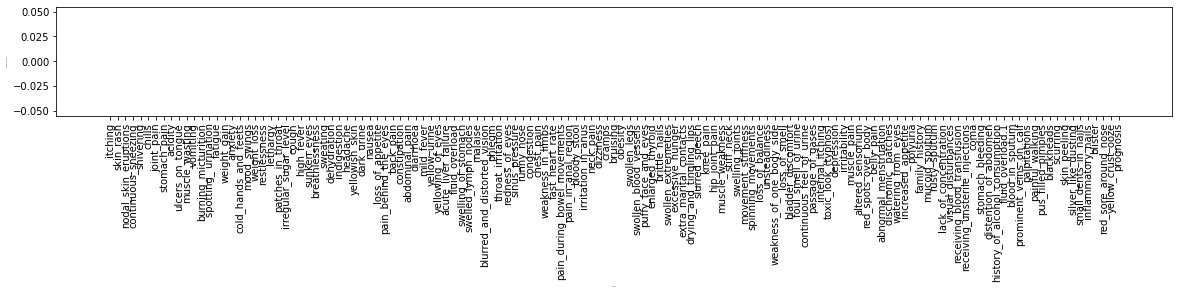

In [19]:
# Checking for missing data : 
plt.figure(figsize=(20, 2))
plt.xticks(rotation=90)
plt.bar(df.columns,df.isnull().sum())
plt.xlabel('Columns', fontsize=1)
plt.ylabel('Missing Value Count', fontsize=1);
plt.show()

I tried plotting the bar plot for the prognosis, count of each disease from a library called seaborn, i tried plotting a bar graph between my diseases and value count in my axis, I used xticks method for better readability and plotted the disease vs value count, which agrees with my results for value count method for the prognosis column, for understanding my data set better i tried to represent this visually

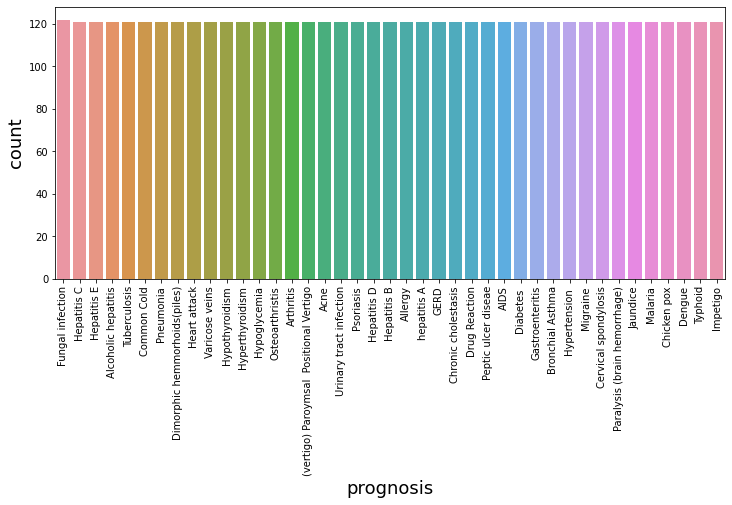

In [20]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x=df.prognosis.value_counts().index,y= df.prognosis.value_counts());
plt.xlabel('prognosis', fontsize=18)
plt.ylabel('count', fontsize=18);

Here, I have calculated the correlation value between the features, using corr() function, which gives the correlation between 2 features, with high correlation value indicating there is high dependence between the 2 features and they are closely related whereas the low correlation indicate that there is no significance dependence between the features, here i also taken the absolute values of the correlation features, to just get the positive values , which indicate that direction between the features is neglected, to get everything in positive value ,i tried using the absolute value of correlation function

In [21]:
df.corr().abs()

itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.319331              0.326653   
skin_rash             0.319331   1.000000              0.298366   
nodal_skin_eruptions  0.326653   0.298366              1.000000   
continuous_sneezing   0.087017   0.094901              0.032586   
shivering             0.059977   0.065412              0.022460   
...                        ...        ...                   ...   
small_dents_in_nails  0.061644   0.330991              0.023085   
inflammatory_nails    0.061644   0.330991              0.023085   
blister               0.061644   0.330991              0.023085   
red_sore_around_nose  0.058051   0.332651              0.023187   
yellow_crust_ooze     0.061644   0.330991              0.023085   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                          0.087017   0.059977  0.176110    0.160836   
skin_rash                        0.094901   0.065412  0.029542    0.170927   
nodal_skin_eruptions             0.032586   0.022460  0.065950    0.060231   
continuous_sneezing              1.000000   0.609789  0.446711    0.087385   
shivering                        0.609789   1.000000  0.295811    0.060231   
...                                   ...        ...       ...         ...   
small_dents_in_nails             0.033492   0.023085  0.067783    0.360042   
inflammatory_nails               0.033492   0.023085  0.067783    0.360042   
blister                          0.033492   0.023085  0.067783    0.061904   
red_sore_around_nose             0.033641   0.023187  0.068084    0.062179   
yellow_crust_ooze                0.033492   0.023085  0.067783    0.061904   

                      stomach_pain   acidity  ulcers_on_tongue  ...  \
itching                   0.202823  0.087017          0.059977  ...   
skin_rash                 0.161921  0.094901          0.065412  ...   
nodal_skin_eruptions      0.032586  0.032586          0.022460  ...   
continuous_sneezing       0.047277  0.047277          0.032586  ...   
shivering                 0.032586  0.032586          0.022460  ...   
...                            ...       ...               ...  ...   
small_dents_in_nails      0.033492  0.033492          0.023085  ...   
inflammatory_nails        0.033492  0.033492          0.023085  ...   
blister                   0.033492  0.033492          0.023085  ...   
red_sore_around_nose      0.033641  0.033641          0.023187  ...   
yellow_crust_ooze         0.033492  0.033492          0.023085  ...   

                      pus_filled_pimples  blackheads  scurring  skin_peeling  \
itching                         0.059977    0.059977  0.059977      0.058051   
skin_rash                       0.320868    0.320868  0.320868      0.332651   
nodal_skin_eruptions            0.022460    0.022460  0.022460      0.023187   
continuous_sneezing             0.032586    0.032586  0.032586      0.033641   
shivering                       0.022460    0.022460  0.022460      0.023187   
...                                  ...         ...       ...           ...   
small_dents_in_nails            0.023085    0.023085  0.023085      0.942391   
inflammatory_nails              0.023085    0.023085  0.023085      0.942391   
blister                         0.023085    0.023085  0.023085      0.023831   
red_sore_around_nose            0.023187    0.023187  0.023187      0.015110   
yellow_crust_ooze               0.023085    0.023085  0.023085      0.023831   

                      silver_like_dusting  small_dents_in_nails  \
itching                          0.061644              0.061644   
skin_rash                        0.330991              0.330991   
nodal_skin_eruptions             0.023085              0.023085   
continuous_sneezing              0.033492              0.033492   
shivering                        0.023085              0.023085   
...                                   ...                   ...  

I tried to visually represent my correlation features using heat map from seaborn and matplotlib libraries, i set my seaborn style as white color, and I created a corr variable which takes in the absolute values of the correlation features, in the correlation matrix, the upper and lower triangle are symmetric, so i create a new variable called mask with zeros with the shape of my corr variable, and as a boolean variable, this hides my upper triangular matrix, which is symmetric with my lower triangular matrix, and I create a heat map with different color scale, the vmax and center functions are used to set the maximum and center values of the color scale and the shape is set to be as square, I am doing this visually, to get a picture of my correlation features and to understand my data in a better way, the fact that my upper triangular matrix is hidden can be clearly be evident if i change my seaborn color change to dark color. This heat map provides me with the visual representation of correlation of features in my data set

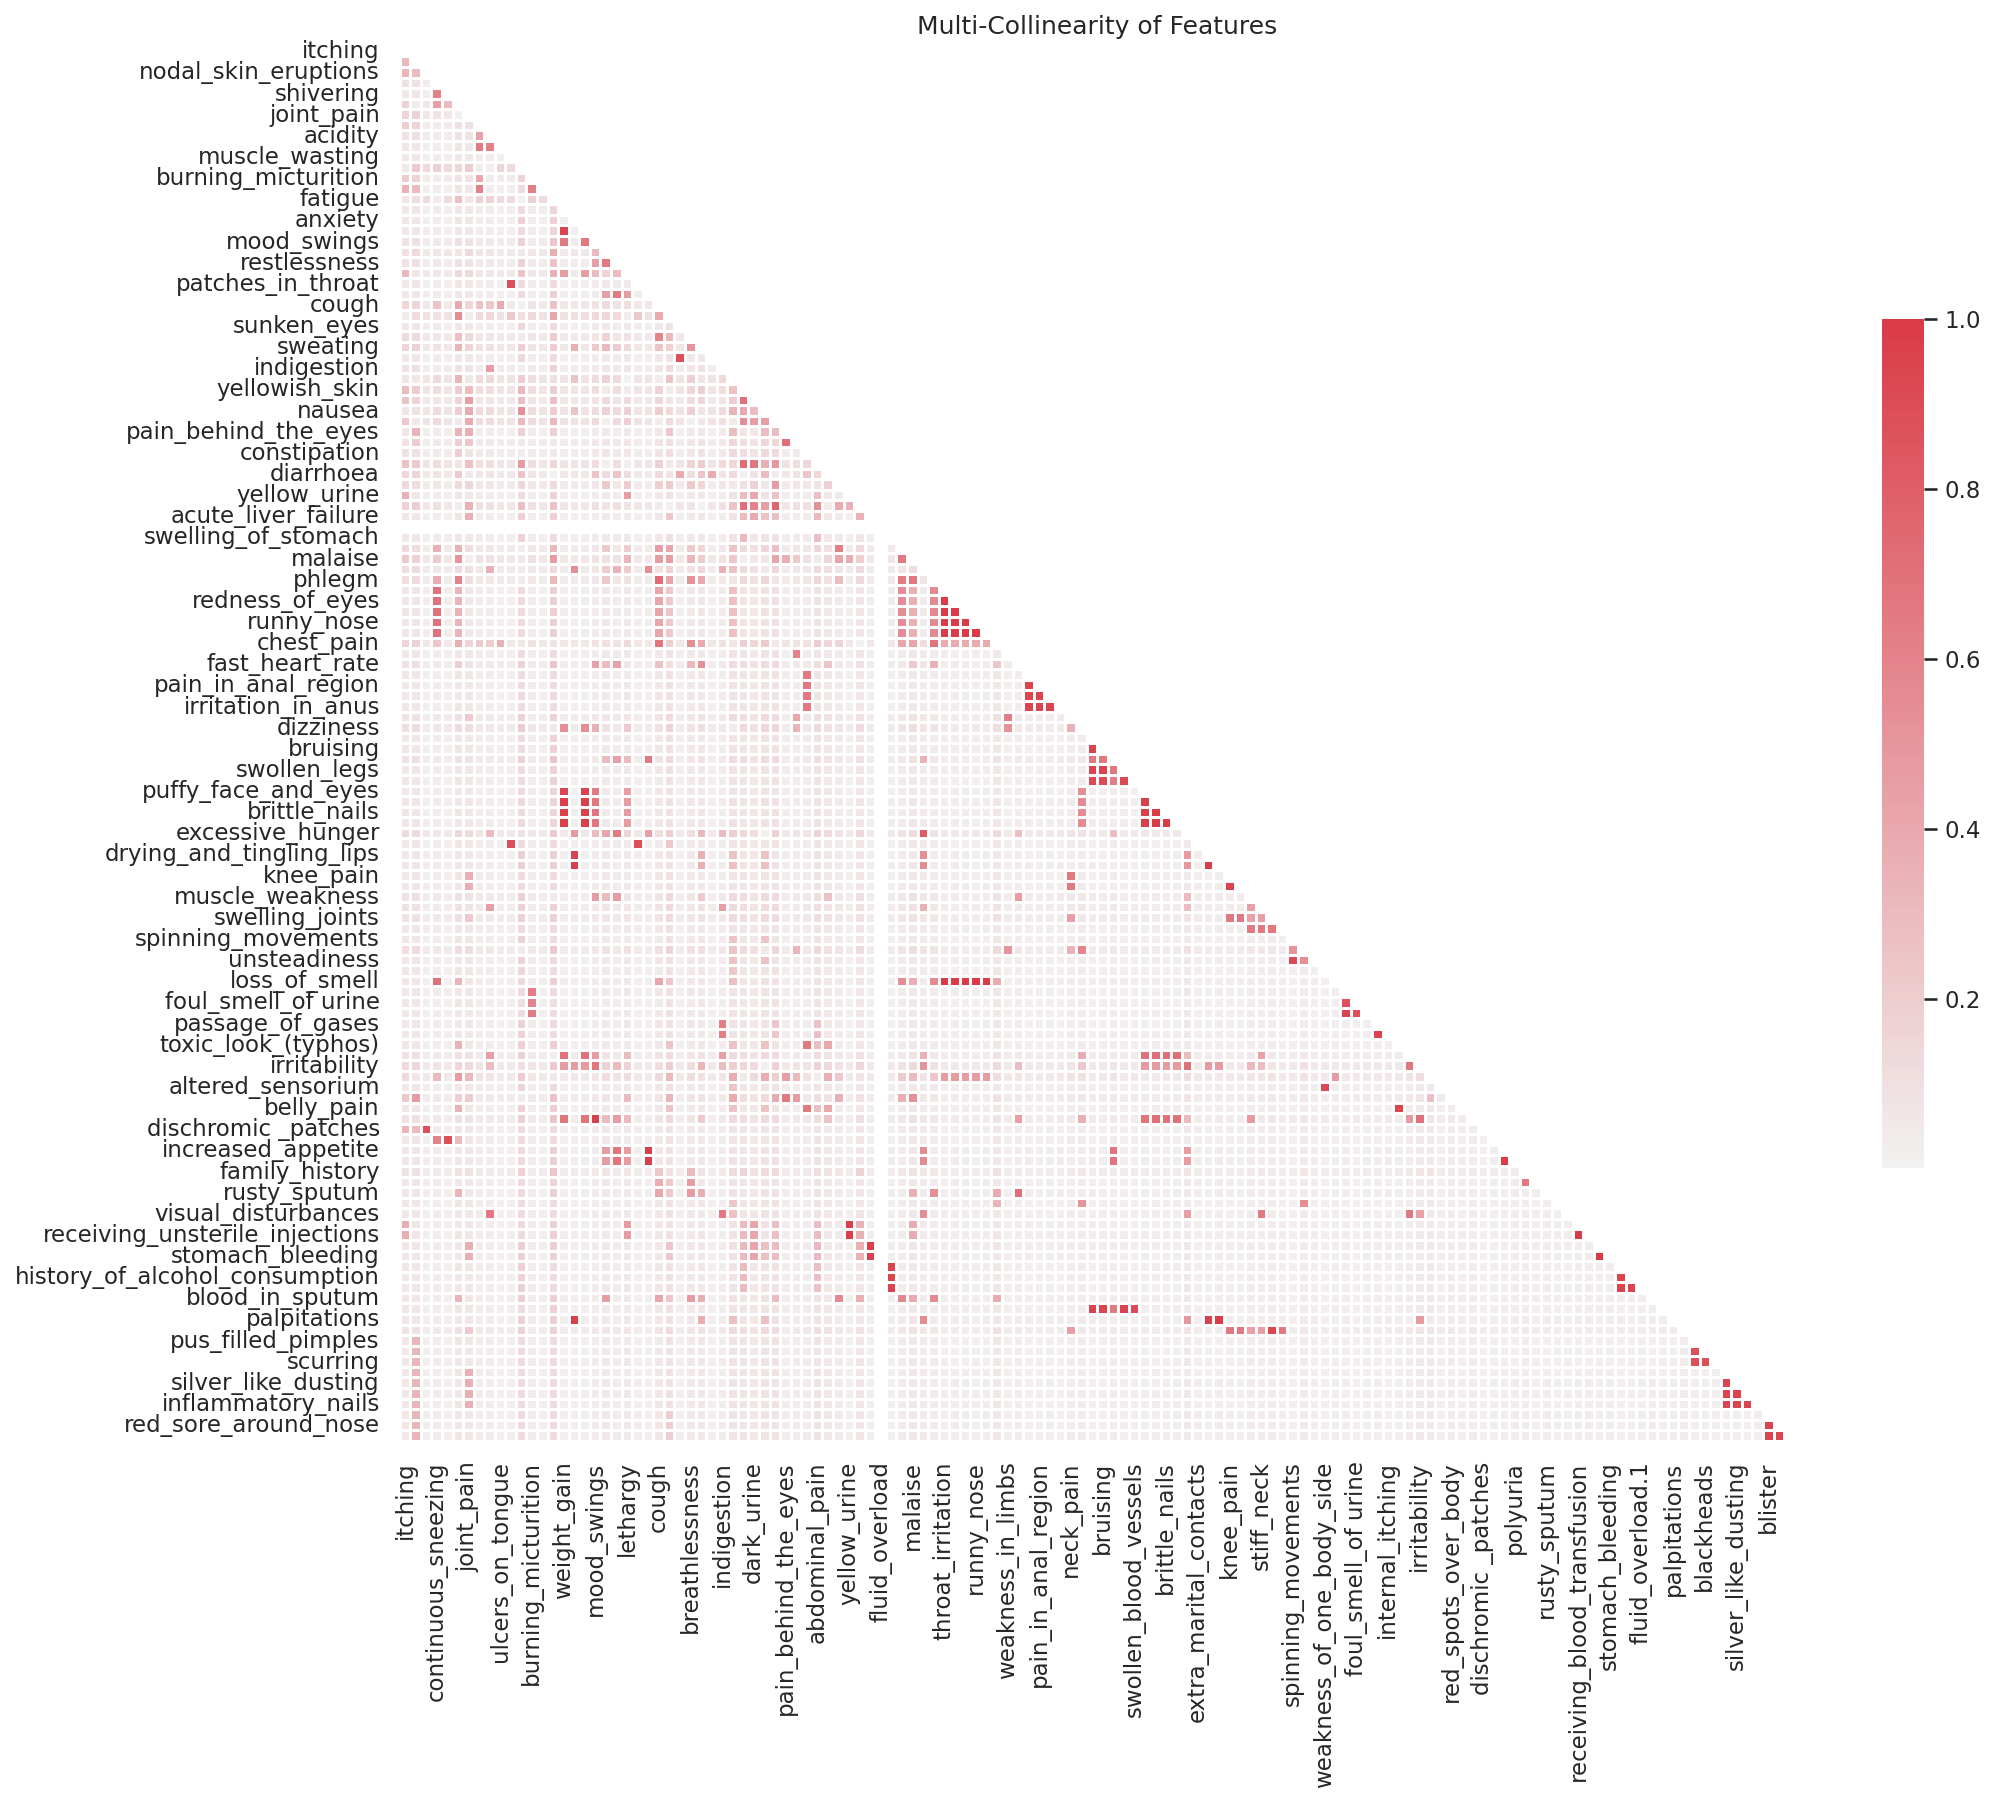

In [22]:
sns.set(style="white")

# Create a covariance matrix
corr = df.corr().abs()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15),dpi=150)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,
linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')
plt.show();

As, the correlation matrix is symmetric, I just take the upper triangular matrix, I created a variable named upper_tri , which takes the shape of the correlation matrix and filled with ones, and the k = 1 value indicate the diagonal offset from the correlation matrix, it does not include diagonal from the matrix and it is converted to boolean values , where the lower triangle values are replaced with NaN values and the upper triangular values are kept in intact. I have performed this to find out pair of highly correlated features in my data set, with highly correlated features can be dropped to reduce the model complexity and to prevent overfitting

In [23]:
# display the matrix in a raw state
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
print(upper_tri)

                      itching  skin_rash  nodal_skin_eruptions  \
itching                   NaN   0.319331              0.326653   
skin_rash                 NaN        NaN              0.298366   
nodal_skin_eruptions      NaN        NaN                   NaN   
continuous_sneezing       NaN        NaN                   NaN   
shivering                 NaN        NaN                   NaN   
...                       ...        ...                   ...   
small_dents_in_nails      NaN        NaN                   NaN   
inflammatory_nails        NaN        NaN                   NaN   
blister                   NaN        NaN                   NaN   
red_sore_around_nose      NaN        NaN                   NaN   
yellow_crust_ooze         NaN        NaN                   NaN   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                          0.087017   0.059977  0.176110    0.160836   
skin_rash                        0.094901   0.06541

Here, I will perform the following steps. I ran a loop, in the upper triangular values to check for highly correlated features, and i dropped the features greater than 0.8, because of the high correlation, which indicates that the features are not completely independent and they have a strong relationship. I tried to drop those features and create a new data frame with the dropped features, and I once again create my features and prognosis variables with the dropped features.51 features are dropped from 132 features  .After extensively performing the above upper triangular visualization and code , this is what we arrive at , all that is done , to drop some of features to reduce my model complexity and to prevent overfitting

In [24]:
# prepare the highly correlated features in a list so we can drop them :
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >0.8)]


df_new=df.drop(columns=to_drop)
# train_2=train.drop(columns=to_drop)
features = df_new.iloc[:,:-1].values
prognosis = df_new.iloc[:,-1].values

print(len(to_drop)) 
#print(); print(to_drop)
features

51


array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 0]], dtype=uint8)

In [25]:
features

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 0]], dtype=uint8)

In [26]:
prognosis

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Psoriasis', 'Impetigo', 'Fungal infection'], dtype=object)

I tried to create my features and prognosis values into train test split from sklearn library which splits my data into training and testing data respectively, with a test size of 0.35 and it shuffles the data before splitting to prevent overfitting

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(features,prognosis,test_size=0.35,random_state=42,shuffle=True)

In [28]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
Y_test

array(['Heart attack', 'Psoriasis', 'Osteoarthristis', ..., 'Hepatitis E',
       'Pneumonia', 'Jaundice'], dtype=object)

I chose  the Random Forest classifier , which is proven to give good accuracy results for classification data and studying from literature survey regarding the disease classification , where in random forest was widely used , this was the reason i chose random forest model,
I perform cross validation for my data , which means that we divide the data set into multiple subsets  and each set is used as testing set , while training the model on other subsets , cross validation is performed to evaluate a models ability to generalize new data , it ensures the model is tested that it has not been trained on , it is also performed to prevent overfitting and for small datasets , as I have small datasets , and for my model to perform well for new data , I have used cross validation , it is stored in a variable rf_cross_score which stores the array of scores , one for each fold of  cross- validation and the mean value is printed for all the arrays for different folds.


In [30]:
from sklearn.ensemble import RandomForestClassifier
Rf_cross_score = cross_val_score(RandomForestClassifier(), features, prognosis, cv = 5)


In [31]:
print(f'Random forest score\'s mean : {Rf_cross_score.mean()}')


Random forest score's mean : 0.9997983870967742


Here , I take the Random forest classifier to fit my data set in , I give the number of estimators , max depth as random values , number of estimators indicate number of decision trees in the forest , and max depth indicate the maximum depth of each decision tree in the random forest .I fit my model for X_train and Y_train values, it gets trained on the training  data i have created  which I have created earlier , and i created a new variable named y_pred which predicts my values on the testing set and I have printed the accuracy of my model 

In [33]:
clf=RandomForestClassifier(n_estimators=150,random_state=0, max_depth=3)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)
#ACCURACY SCORE
print(y_pred)
print(Y_test)
#print(f"Accuracy->{metrics.accuracy_score(X_test, y_pred)}")
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


['Dimorphic hemmorhoids(piles)' 'Psoriasis' 'Osteoarthristis' ...
 'Hepatitis E' 'Pneumonia' 'Jaundice']
['Heart attack' 'Psoriasis' 'Osteoarthristis' ... 'Hepatitis E'
 'Pneumonia' 'Jaundice']
Accuracy: 0.9556706966033391


In [34]:
y_pred

array(['Dimorphic hemmorhoids(piles)', 'Psoriasis', 'Osteoarthristis',
       ..., 'Hepatitis E', 'Pneumonia', 'Jaundice'], dtype=object)

I have tried to determine the optimal number of estimators (number of trees) for the given data set , I have created an empty list called accuracy random forest ,I have written a for loop , which loops over the number of estimators till the range, for each number of estimator , I try to train my model and predict it on the test set and and tried to get accuracy for each number of estimator and tried plotting it with, to get the visual idea of number of trees required .

100%|██████████| 149/149 [00:47<00:00,  3.13it/s]


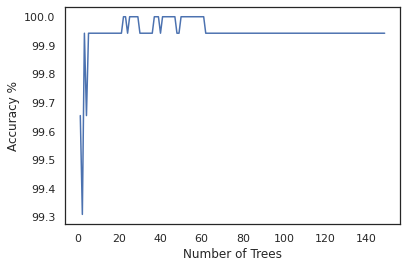

We get the maximum accuracy as early as when the MAX_number of trees is->  21


In [38]:
Accuracy_random_forest=[]

for i in tqdm(range(1,150)):
    clf=RandomForestClassifier(n_estimators=i,random_state=0)
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    #ACCURACY SCORE
    Accuracy_random_forest.append(100*metrics.accuracy_score(Y_test, y_pred))
    
plt.plot(np.linspace(1,149,149),Accuracy_random_forest)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy %")
plt.show()
print(f"We get the maximum accuracy as early as when the MAX_number of trees is->  {np.amin(np.argwhere(Accuracy_random_forest==max(Accuracy_random_forest)))}")


I have tried to determine the max depth for the given data set with the similar logic as number of estimators and accuracy , here i would loop over max depth and plot it with accuracy for each iteration and plot it to visually see the results 

100%|██████████| 149/149 [01:30<00:00,  1.65it/s]


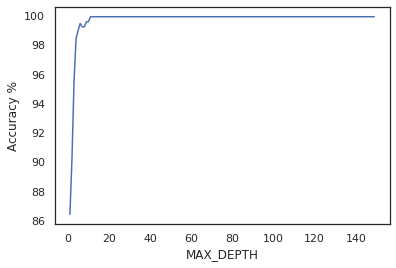

We get the maximum accuracy as early as when the MAX_DEPTH is->  10


In [37]:
Accuracy_random_forest=[]

for i in tqdm(range(1,150)):
    clf=RandomForestClassifier(n_estimators=150,random_state=0,max_depth=i)
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    #ACCURACY SCORE
    Accuracy_random_forest.append(100*metrics.accuracy_score(Y_test, y_pred))
    
plt.plot(np.linspace(1,149,149),Accuracy_random_forest)
plt.xlabel("MAX_DEPTH")
plt.ylabel("Accuracy %")
plt.show()


print(f"We get the maximum accuracy as early as when the MAX_DEPTH is->  {np.amin(np.argwhere(Accuracy_random_forest==max(Accuracy_random_forest)))}")


After the optimal number of trees and depth , I wanted to perform performance metrics, I wanted to create a confusion matrix , though the word is jargon , it takes input as y_test and y_pred , so what this does is , it creates a table , summarizing the performance of our classification model by comparing the true and predicted labels , it has 4 entries True positive , false positive , true negative and false negative , the diagonal left to right indicate the correctly predicted values and the other diagonal indicated the falsely predicted values  and the classification report , taking the inputs from the confusion matrix gives us various performance metrics such as Precision , Recall , F1 score , These performance metrics are indication of our classification model

Recall is particularly important in health care services over accuracy and F1 score , because we can not afford to have false negative in health care , it is okay to be overcautious for the model and give false positives , but false negative would not be desirable 

In [39]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[36  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 46  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 45]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        36
                                   AIDS       1.00      1.00      1.00        49
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        46
                                Allergy       1.00      1.00      1.00        40
                              Arthritis       1.00      1.00      1.00        45
                       Bronchial Asthma       1.00      1.00      1.00        46
                   Cervical spondylosis       1.00      1.00      1.00        41
                            Chicken pox       1.00      1.00      1.00        37
                    Chronic chole

I tried creating a heat map of normalized confusion matrix for random forest classifier for the test set data , i get a diagonal from left to right one , which indicates the correctly predicted values , in this brighter colors indicate the high values

<AxesSubplot:>

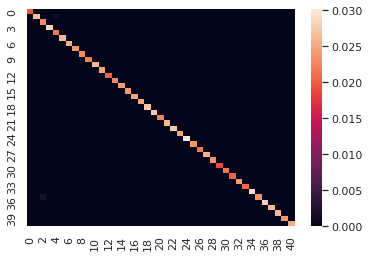

In [56]:
sns.heatmap(confusion_matrix(Y_test,y_pred)/np.sum(confusion_matrix(Y_test,y_pred)))

In [43]:
total_recall = recall_score(Y_test, y_pred, average='weighted')

# Print the recall score
print("Total Recall: {:.2f}".format(total_recall))

Total Recall: 1.00


By this Point, I have realized that my data was perfect, which is not the usual case in the real world applications , I was able to get really high accuracies and Total recall values , I have tried experimenting different ways about how this is possible, I tried to tune my max depth in my random forest classifier and I was able to get down my accuracy  , and I have even looked at my Kaggle Dataset , other contributors code , and realized even they were getting really high accuracies and total recall values .

For , the next section of my project , I wanted to classify my data into different labels based on severity , and common occurence of the data set , and then added few features and tried to perform my model evaluation once again , i follow the same method as above for this modified data set as well, even though i had achieved really high accuracy and recall values for this data , I wanted to bring down the model complexity and perform better feature engineering , by reducing the redundant features , the model can be trained and evaluated more quickly.

# Modified Data

Importing the relevant libraries for the dataset .

In [540]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn import tree
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import r2_score



from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import recall_score

Skf = StratifiedKFold(n_splits=5) 
import warnings
warnings.filterwarnings("ignore")


Loading the data file into my pandas library , I perform all the operations same as above ,as I have explained the above concepts above , I am writing as a glimpse over here.

In [541]:
data=pd.read_csv("combined_data.csv")


In [542]:
data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4957        0          1                     0                    0   
4958        0          0                     0                    0   
4959        0          1                     0                    0   
4960        0          1                     0                    0   
4961        1          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4957          0       0           0             0        0                 0   
4958          0       0           0             0        0                 0   
4959          0       0           1             0        0                 0   
4960          0       0           0             0        0                 0   
4961          0       0           0             0        0                 0   

      ...  skin_peeling  silver_like_dusting  small_dents_in_nails  \
0     ...             0                    0                     0   
1     ...             0                    0                     0   
2     ...             0                    0                     0   
3     ...             0                    0                     0   
4     ...             0                    0                     0   
...   ...           ...                  ...                   ...   
4957  ...             0                    0                     0   
4958  ...             0                    0                     0   
4959  ...             1                    1                     1   
4960  ...             0                    0                     0   
4961  ...             1                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                      0        0                     0                  0   
1                      0        0                     0                  0   
2                      0        0                     0                  0   
3                      0        0                     0                  0   
4                      0        0                     0                  0   
...                  ...      ...                   ...                ...   
4957                   0        0                     0                  0   
4958                   0        0                     0                  0   
4959                   1        0                     0                  0   
4960                   0        1                     1                  1   
4961                   0        0                     1                  0   

                    prognosis  Unnamed: 133  is_train  
0            Fungal infection           NaN      True  
1            Fungal infection           NaN      True  
2            Fungal infection           NaN      True  
3            Fungal infection           NaN      True  
4            Fungal infection           NaN      True  
...                       ...           ...       ...  
4957                  

I drop the irrelevant features from my column, which i have obtained from combining my training and test data set.

In [543]:
data = data.drop(columns=['Unnamed: 133', 'is_train'],axis=1)

In [544]:
data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4957        0          1                     0                    0   
4958        0          0                     0                    0   
4959        0          1                     0                    0   
4960        0          1                     0                    0   
4961        1          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4957          0       0           0             0        0                 0   
4958          0       0           0             0        0                 0   
4959          0       0           1             0        0                 0   
4960          0       0           0             0        0                 0   
4961          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4957  ...           1         1             0                    0   
4958  ...           0         0             0                    0   
4959  ...           0         0             1                    1   
4960  ...           0         0             0                    0   
4961  ...           0         0             1                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4957                     0                   0        0                     0   
4958                     0                   0        0                     0   
4959                     1                   1        0                     0   
4960                     0                   0        1                     1   
4961                     0                   0        0                     1   

      yellow_crust_ooze                prognosis  
0                     0         Fungal infection  
1                     0         Fungal infection  
2                     0         Fungal infection  
3                     0         Fungal infection  
4                     0         Fungal infection  
...                 ...                      ...  
4957                 

I tried to find the shape , which includes the number of rows and columns in the dataset to get a sense of data , and I tried finding out the data types of all the columns in the dataset 

In [545]:
data.shape

(4962, 133)

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


I tried to find the memory usage from the df.info method which gave me 5.0 MB+, and the datatype for each column was stored as in int 64 bytes , I felt the memory usage was more , because in my symptoms columns the values are stored just 0 and 1 value , and I tried converting the dtypes into int 8 bytes , I tried writing a for loop which loops in all the columns except the last one and convert the int 64 data types to int 8 bytes , after performing the operation , I have achieved significantly reducing the memory usage to 678 Kb , i tried performing this operation to reduce memory usage of the system.

In [547]:
a=data.columns[:-1]
for i in a:
    data[i] = data[i].astype("uint8")
print(data.dtypes)

itching                  uint8
skin_rash                uint8
nodal_skin_eruptions     uint8
continuous_sneezing      uint8
shivering                uint8
                         ...  
inflammatory_nails       uint8
blister                  uint8
red_sore_around_nose     uint8
yellow_crust_ooze        uint8
prognosis               object
Length: 133, dtype: object


In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: object(1), uint8(132)
memory usage: 678.5+ KB


Here , in this data , i have labeled as levels , where in itching is classified as label 2 , which indicate less severe  and dark urine and label 5 which is more severe and rare , with this , I wanted to create a level of seriousness for the physician for him to make a better decision and seriousness of the disease . I have manually created levels from my data set to indicate the severity .

In [549]:
#Level 2
label_2=['itching','continuous_sneezing','stomach_pain','acidity','vomiting','anxiety','lethargy','cough',\
         'indigestion','headache','constipation','mild_fever','malaise','phlegm','runny_nose','dizziness',\
         'family_history','scurring','blister','small_dents_in_nails','red_sore_around_nose']

#Level 3
label_3=['skin_rash','shivering','chills','joint_pain','ulcers_on_tongue','fatigue','weight_gain',\
         'cold_hands_and_feets','mood_swings','weight_loss','restlessness','high_fever','sunken_eyes',\
         'sweating','dehydration','nausea','back_pain','abdominal_pain','diarrhoea','yellow_urine',\
         'swelling_of_stomach','throat_irritation','redness_of_eyes','congestion','chest_pain',\
         'neck_pain','cramps','puffy_face_and_eyes','obesity','drying_and_tingling_lips',\
         'swelling_joints','depression','irritability','muscle_pain','foul_smell_of urine',\
         'abnormal_menstruation','passage_of_gases','watering_from_eyes','polyuria','lack_of_concentration',\
         'distention_of_abdomen','history_of_alcohol_consumption','prominent_veins_on_calf','blackheads','skin_peeling']


#Level 4
label_4=['continuous_feel_of_urine','nodal_skin_eruptions','muscle_wasting','burning_micturition',\
         'patches_in_throat','irregular_sugar_level','breathlessness','loss_of_appetite','pain_behind_the_eyes',\
         'yellowing_of_eyes','sinus_pressure','weakness_in_limbs','pain_during_bowel_movements','pain_in_anal_region',\
         'irritation_in_anus','bruising','swollen_legs','brittle_nails','swollen_extremeties','excessive_hunger',\
         'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','extra_marital_contacts',\
         'unsteadiness','weakness_of_one_body_side','bladder_discomfort','internal_itching','toxic_look_(typhos)',\
         'red_spots_over_body','belly_pain','dischromic _patches','increased_appetite','mucoid_sputum',\
         'visual_disturbances','receiving_unsterile_injections','fluid_overload.1','blood_in_sputum',\
         'palpitations','painful_walking','pus_filled_pimples','inflammatory_nails','yellow_crust_ooze']

    
#Level 5
label_5=['spotting_ urination','yellowish_skin','dark_urine','acute_liver_failure','fluid_overload',\
         'blurred_and_distorted_vision','fast_heart_rate','bloody_stool','swollen_blood_vessels',\
         'enlarged_thyroid','movement_stiffness','spinning_movements','loss_of_balance','loss_of_smell',\
         'altered_sensorium','receiving_blood_transfusion','rusty_sputum','coma','stomach_bleeding','silver_like_dusting']

I have modified  the label 2 ,label 3 , label 4 and 5 in my data set , and tried to print the values for each label

In [550]:
data[label_2]=data[label_2]*2
data[label_3]=data[label_3]*3
data[label_4]=data[label_4]*4
data[label_5]=data[label_5]*5

In [551]:
data[label_2]

itching  continuous_sneezing  stomach_pain  acidity  vomiting  anxiety  \
0           2                    0             0        0         0        0   
1           0                    0             0        0         0        0   
2           2                    0             0        0         0        0   
3           2                    0             0        0         0        0   
4           2                    0             0        0         0        0   
...       ...                  ...           ...      ...       ...      ...   
4957        0                    0             0        0         0        0   
4958        0                    0             0        0         0        0   
4959        0                    0             0        0         0        0   
4960        0                    0             0        0         0        0   
4961        2                    0             0        0         0        0   

      lethargy  cough  indigestion  headache  ...  mild_fever  malaise  \
0            0      0            0         0  ...           0        0   
1            0      0            0         0  ...           0        0   
2            0      0            0         0  ...           0        0   
3            0      0            0         0  ...           0        0   
4            0      0            0         0  ...           0        0   
...        ...    ...          ...       ...  ...         ...      ...   
4957         0      0            0         0  ...           0        0   
4958         0      0            0         0  ...           0        0   
4959         0      0            0         0  ...           0        0   
4960         0      0            0         0  ...           0        0   
4961         0      0            0         0  ...           0        0   

      phlegm  runny_nose  dizziness  family_history  scurring  blister  \
0          0           0          0               0         0        0   
1          0           0          0               0         0        0   
2          0           0          0               0         0        0   
3          0           0          0               0         0        0   
4          0           0          0               0         0        0   
...      ...         ...        ...             ...       ...      ...   
4957       0           0          0               0         2        0   
4958       0           0          0               0         0        0   
4959       0           0          0               0         0        0   
4960       0           0          0               0         0        2   
4961       0           0          0               2         0        0   

      small_dents_in_nails  red_sore_around_nose  
0                        0                     0  
1                        0                     0  
2                        0                     0  
3                        0                     0  
4                        0                     0  
...                    ...                   ...  
4957                     0                     0  
4958                     0                     0  
4959                     2                     0  
4960                     0                     2  
4961                     0                     2  

[4962 rows x 21 columns]

In [552]:
data[label_3]

skin_rash  shivering  chills  joint_pain  ulcers_on_tongue  fatigue  \
0             3          0       0           0                 0        0   
1             3          0       0           0                 0        0   
2             0          0       0           0                 0        0   
3             3          0       0           0                 0        0   
4             3          0       0           0                 0        0   
...         ...        ...     ...         ...               ...      ...   
4957          3          0       0           0                 0        0   
4958          0          0       0           0                 0        0   
4959          3          0       0           3                 0        0   
4960          3          0       0           0                 0        0   
4961          3          0       0           0                 0        0   

      weight_gain  cold_hands_and_feets  mood_swings  weight_loss  ...  \
0               0                     0            0            0  ...   
1               0                     0            0            0  ...   
2               0                     0            0            0  ...   
3               0                     0            0            0  ...   
4               0                     0            0            0  ...   
...           ...                   ...          ...          ...  ...   
4957            0                     0            0            0  ...   
4958            0                     0            0            0  ...   
4959            0                     0            0            0  ...   
4960            0                     0            0            0  ...   
4961            0                     0            0            0  ...   

      abnormal_menstruation  passage_of_gases  watering_from_eyes  polyuria  \
0                         0                 0                   0         0   
1                         0                 0                   0         0   
2                         0                 0                   0         0   
3                         0                 0                   0         0   
4                         0                 0                   0         0   
...                     ...               ...                 ...       ...   
4957                      0                 0                   0         0   
4958                      0                 0                   0         0   
4959                      0                 0                   0         0   
4960                      0                 0                   0         0   
4961                      0                 0                   0         0   

      lack_of_concentration  distention_of_abdomen  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   
...                     ...                    ...   
4957                      0                      0   
4958                      0                      0   
4959                      0                      0   
4960                      0                      0   
4961                      0                      0   

      history_of_alcohol_consumption  prominent_veins_on_calf  blackheads  \
0                                  0                        0           0   
1                                  0                        0           0   
2                                  0                        0           0   
3                                  0                        0           0   
4                                  0                        0           0   
...                              ...                      ...         ...   
4957                               0                   

In [553]:
data[label_4]

continuous_feel_of_urine  nodal_skin_eruptions  muscle_wasting  \
0                            0                     4               0   
1                            0                     4               0   
2                            0                     4               0   
3                            0                     0               0   
4                            0                     4               0   
...                        ...                   ...             ...   
4957                         0                     0               0   
4958                         4                     0               0   
4959                         0                     0               0   
4960                         0                     0               0   
4961                         0                     0               0   

      burning_micturition  patches_in_throat  irregular_sugar_level  \
0                       0                  0                      0   
1                       0                  0                      0   
2                       0                  0                      0   
3                       0                  0                      0   
4                       0                  0                      0   
...                   ...                ...                    ...   
4957                    0                  0                      0   
4958                    4                  0                      0   
4959                    0                  0                      0   
4960                    0                  0                      0   
4961                    0                  0                      0   

      breathlessness  loss_of_appetite  pain_behind_the_eyes  \
0                  0                 0                     0   
1                  0                 0                     0   
2                  0                 0                     0   
3                  0                 0                     0   
4                  0                 0                     0   
...              ...               ...                   ...   
4957               0                 0                     0   
4958               0                 0                     0   
4959               0                 0                     0   
4960               0                 0                     0   
4961               0                 0                     0   

      yellowing_of_eyes  ...  mucoid_sputum  visual_disturbances  \
0                     0  ...              0                    0   
1                     0  ...              0                    0   
2                     0  ...              0                    0   
3                     0  ...              0                    0   
4                     0  ...              0                    0   
...                 ...  ...            ...                  ...   
4957                  0  ...              0                    0   
4958                  0  ...              0                    0   
4959                  0  ...              0                    0   
4960                  0  ...              0                    0   
4961                  0  ...              0                    0   

      receiving_unsterile_injections  fluid_overload.1  blood_in_sputum  \
0                                  0                 0                0   
1                                  0                 0                0   
2                                  0                 0                0   
3                                  0                 0                0   
4                                  0                 0                0   
...                              ...               ...              ...   
4957                               0                 0                0   
4958                               0                 0                0   
4959                       

In [554]:
data[label_5]

spotting_ urination  yellowish_skin  dark_urine  acute_liver_failure  \
0                       0               0           0                    0   
1                       0               0           0                    0   
2                       0               0           0                    0   
3                       0               0           0                    0   
4                       0               0           0                    0   
...                   ...             ...         ...                  ...   
4957                    0               0           0                    0   
4958                    0               0           0                    0   
4959                    0               0           0                    0   
4960                    0               0           0                    0   
4961                    0               0           0                    0   

      fluid_overload  blurred_and_distorted_vision  fast_heart_rate  \
0                  0                             0                0   
1                  0                             0                0   
2                  0                             0                0   
3                  0                             0                0   
4                  0                             0                0   
...              ...                           ...              ...   
4957               0                             0                0   
4958               0                             0                0   
4959               0                             0                0   
4960               0                             0                0   
4961               0                             0                0   

      bloody_stool  swollen_blood_vessels  enlarged_thyroid  \
0                0                      0                 0   
1                0                      0                 0   
2                0                      0                 0   
3                0                      0                 0   
4                0                      0                 0   
...            ...                    ...               ...   
4957             0                      0                 0   
4958             0                      0                 0   
4959             0                      0                 0   
4960             0                      0                 0   
4961             0                      0                 0   

      movement_stiffness  spinning_movements  loss_of_balance  loss_of_smell  \
0                      0                   0                0              0   
1                      0                   0                0              0   
2                      0                   0                0              0   
3                      0                   0                0              0   
4                      0                   0                0              0   
...                  ...                 ...              ...            ...   
4957                   0                   0                0              0   
4958                   0                   0                0              0   
4959                   0                   0                0              0   
4960                   0                   0                0              0   
4961                   0                   0                0              0   

      altered_sensorium  receiving_blood_transfusion  rusty_sputum  coma  \
0                     0                            0             0     0   
1                     0                            0             0     0   
2                     0                            0             0     0   
3                     0                            0             0     0   
4                     0                            0             0     0   
...                 ...                   

I have tried creating new features such as covid 19 , indigestion , obesity, Opthalmoplegia , total_pain , total_score ,blood_alcohol, feature_1 and have added the corresponding symptoms for the added diseases 

In [555]:
created_features=['feature1','covid19','total_pain','indigestion','over_weight', 'blood_alcohol','Ophthalmoplegia','total_score']
#stomach pain and acidity ,
data['feature1']=data.stomach_pain+data.acidity

# sunken eyes and high fever, breathlessness ,throat irritation, cough, loss_of_smell
data['covid19']=data.sunken_eyes+data.breathlessness+data.throat_irritation+data.high_fever+data.cough+data.loss_of_smell

data['total_pain']=data.joint_pain+data.stomach_pain+data.pain_behind_the_eyes+data.back_pain+data.constipation+\
    data.abdominal_pain+data.chest_pain+data.pain_during_bowel_movements+ data.pain_in_anal_region+\
    data.neck_pain+data.knee_pain+ data.hip_joint_pain+data.muscle_pain+data.belly_pain+data.painful_walking

# chest pain and acidity, and throat irritation
data['indigestion']=data.chest_pain+data.acidity+data.throat_irritation

# obesity and joint pain, back_pain, weight_gain, weight_loss
data['over_weight']=data.obesity+data.joint_pain+data.back_pain+data.weight_gain+data.weight_loss

# spinnig movementsn and loss of balance, acute liver failure and dark urine,vomiting and stomach pain, dizziness
data['blood_alcohol']=data.spinning_movements+data.loss_of_balance+data.acute_liver_failure+data.dark_urine+\
    data.vomiting+data.stomach_pain+data.dizziness

#pain behind the eyes and blurred and distorrted vision and visual disturbances
data['Ophthalmoplegia']=data.pain_behind_the_eyes+ data.blurred_and_distorted_vision+ data.yellowing_of_eyes+ data.redness_of_eyes






In [556]:
data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           2          3                     4                    0   
1           0          3                     4                    0   
2           2          0                     4                    0   
3           2          3                     0                    0   
4           2          3                     4                    0   
...       ...        ...                   ...                  ...   
4957        0          3                     0                    0   
4958        0          0                     0                    0   
4959        0          3                     0                    0   
4960        0          3                     0                    0   
4961        2          3                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4957          0       0           0             0        0                 0   
4958          0       0           0             0        0                 0   
4959          0       0           3             0        0                 0   
4960          0       0           0             0        0                 0   
4961          0       0           0             0        0                 0   

      ...  blister  red_sore_around_nose  yellow_crust_ooze  \
0     ...        0                     0                  0   
1     ...        0                     0                  0   
2     ...        0                     0                  0   
3     ...        0                     0                  0   
4     ...        0                     0                  0   
...   ...      ...                   ...                ...   
4957  ...        0                     0                  0   
4958  ...        0                     0                  0   
4959  ...        0                     0                  0   
4960  ...        2                     2                  4   
4961  ...        0                     2                  0   

                    prognosis  feature1  covid19  total_pain  over_weight  \
0            Fungal infection         0        0           0            0   
1            Fungal infection         0        0           0            0   
2            Fungal infection         0        0           0            0   
3            Fungal infection         0        0           0            0   
4            Fungal infection         0        0           0            0   
...                       ...       ...      ...         ...          ...   
4957                     Acne         0        0           0            0   
4958  Urinary tract infection         0        0           0            0   
4959                Psoriasis         0        0           3            3   
4960                 Impetigo         0        3           0            0   
4961         Fungal infection         0        0           0            0   

      blood_alcohol  Ophthalmoplegia  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  
...             ...              ...  
4957              0                0  
4958              0                0  
4959              0                0  
4960              0                0  
4961              0                0  

[4962 rows x 139 columns]

I tried to calculate the total score of all patients , across all the columns , which is done through by selecting axis as 1 , and i have squared it to show the sum of squares of all symptoms of the patient to get a health score

In [557]:
data['total_score']=data.sum(axis = 1).tolist()
data['total_score']=data['total_score']**2
data['total_score']


0       169
1       121
2       100
3        81
4        81
       ... 
4957    144
4958    225
4959    676
4960    289
4961    256
Name: total_score, Length: 4962, dtype: int64

In [558]:
f = data.columns
f

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis', 'feature1',
       'covid19', 'total_pain', 'over_weight', 'blood_alcohol',
       'Ophthalmoplegia', 'total_score'],
      dtype='object', length=140)

I tried to calculate the length of newly added created features 

In [559]:
len(created_features)

8

In [560]:
data.shape

(4962, 140)

When , I have added the created features , i got the new features after my prognosis , the new features are added to the last , and I wanted my newly added features before my prognosis column , I tried to get the index positions of the prognosis and Ophthalmoplegia column from get_loc function  so I swapped , my prognosis column with the Ophthalmoplegia column and renamed the columns , I have swapped once again between total score and prognosis .

In [561]:
cols=data.columns
prognosis_index = cols.get_loc('prognosis')
prognosis_index

132

In [562]:
Opthmalgia = data.columns.get_loc('Ophthalmoplegia')
Opthmalgia

138

In [563]:
data.iloc[:,[132,138]] = data.iloc[:,[138,132]]

In [564]:
data=data.rename(columns={'Ophthalmoplegia': 'prognosis', 'prognosis': 'Ophthalmoplegia'})
data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           2          3                     4                    0   
1           0          3                     4                    0   
2           2          0                     4                    0   
3           2          3                     0                    0   
4           2          3                     4                    0   
...       ...        ...                   ...                  ...   
4957        0          3                     0                    0   
4958        0          0                     0                    0   
4959        0          3                     0                    0   
4960        0          3                     0                    0   
4961        2          3                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4957          0       0           0             0        0                 0   
4958          0       0           0             0        0                 0   
4959          0       0           3             0        0                 0   
4960          0       0           0             0        0                 0   
4961          0       0           0             0        0                 0   

      ...  red_sore_around_nose  yellow_crust_ooze  Ophthalmoplegia  feature1  \
0     ...                     0                  0                0         0   
1     ...                     0                  0                0         0   
2     ...                     0                  0                0         0   
3     ...                     0                  0                0         0   
4     ...                     0                  0                0         0   
...   ...                   ...                ...              ...       ...   
4957  ...                     0                  0                0         0   
4958  ...                     0                  0                0         0   
4959  ...                     0                  0                0         0   
4960  ...                     2                  4                0         0   
4961  ...                     2                  0                0         0   

      covid19  total_pain  over_weight  blood_alcohol  \
0           0           0            0              0   
1           0           0            0              0   
2           0           0            0              0   
3           0           0            0              0   
4           0           0            0              0   
...       ...         ...          ...            ...   
4957        0           0            0              0   
4958        0           0            0              0   
4959        0           3            3              0   
4960        3           0            0              0   
4961        0           0            0              0   

                    prognosis  total_score  
0            Fungal infection          169  
1            Fungal infection          121  
2            Fungal infection          100  
3            Fungal infection           81  
4            Fungal infection           81  
...                       ...          ...  
4957                     Acne          144  
4958  Urinary tract infection          225  
4959                Psoriasis          676  
4960                 Impetigo          289  
4961         Fungal infection          

In [565]:
data.iloc[:,[-2,-1]] = data.iloc[:,[-1,-2]]

In [566]:
data=data.rename(columns={'total_score': 'prognosis', 'prognosis': 'total_score'})

In [567]:
data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           2          3                     4                    0   
1           0          3                     4                    0   
2           2          0                     4                    0   
3           2          3                     0                    0   
4           2          3                     4                    0   
...       ...        ...                   ...                  ...   
4957        0          3                     0                    0   
4958        0          0                     0                    0   
4959        0          3                     0                    0   
4960        0          3                     0                    0   
4961        2          3                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4957          0       0           0             0        0                 0   
4958          0       0           0             0        0                 0   
4959          0       0           3             0        0                 0   
4960          0       0           0             0        0                 0   
4961          0       0           0             0        0                 0   

      ...  red_sore_around_nose  yellow_crust_ooze  Ophthalmoplegia  feature1  \
0     ...                     0                  0                0         0   
1     ...                     0                  0                0         0   
2     ...                     0                  0                0         0   
3     ...                     0                  0                0         0   
4     ...                     0                  0                0         0   
...   ...                   ...                ...              ...       ...   
4957  ...                     0                  0                0         0   
4958  ...                     0                  0                0         0   
4959  ...                     0                  0                0         0   
4960  ...                     2                  4                0         0   
4961  ...                     2                  0                0         0   

      covid19  total_pain  over_weight  blood_alcohol  total_score  \
0           0           0            0              0          169   
1           0           0            0              0          121   
2           0           0            0              0          100   
3           0           0            0              0           81   
4           0           0            0              0           81   
...       ...         ...          ...            ...          ...   
4957        0           0            0              0          144   
4958        0           0            0              0          225   
4959        0           3            3              0          676   
4960        3           0            0              0          289   
4961        0           0            0              0          256   

                    prognosis  
0            Fungal infection  
1            Fungal infection  
2            Fungal infection  
3            Fungal infection  
4            Fungal infection  
...                       ...  
4957                     Acne  
4958  Urinary tract infection  
4959                Psoriasis  
4960                 Impetigo  
4961         Fungal infect

In [568]:
data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [569]:
data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           2          3                     4                    0   
1           0          3                     4                    0   
2           2          0                     4                    0   
3           2          3                     0                    0   
4           2          3                     4                    0   
...       ...        ...                   ...                  ...   
4957        0          3                     0                    0   
4958        0          0                     0                    0   
4959        0          3                     0                    0   
4960        0          3                     0                    0   
4961        2          3                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4957          0       0           0             0        0                 0   
4958          0       0           0             0        0                 0   
4959          0       0           3             0        0                 0   
4960          0       0           0             0        0                 0   
4961          0       0           0             0        0                 0   

      ...  red_sore_around_nose  yellow_crust_ooze  Ophthalmoplegia  feature1  \
0     ...                     0                  0                0         0   
1     ...                     0                  0                0         0   
2     ...                     0                  0                0         0   
3     ...                     0                  0                0         0   
4     ...                     0                  0                0         0   
...   ...                   ...                ...              ...       ...   
4957  ...                     0                  0                0         0   
4958  ...                     0                  0                0         0   
4959  ...                     0                  0                0         0   
4960  ...                     2                  4                0         0   
4961  ...                     2                  0                0         0   

      covid19  total_pain  over_weight  blood_alcohol  total_score  \
0           0           0            0              0          169   
1           0           0            0              0          121   
2           0           0            0              0          100   
3           0           0            0              0           81   
4           0           0            0              0           81   
...       ...         ...          ...            ...          ...   
4957        0           0            0              0          144   
4958        0           0            0              0          225   
4959        0           3            3              0          676   
4960        3           0            0              0          289   
4961        0           0            0              0          256   

                    prognosis  
0            Fungal infection  
1            Fungal infection  
2            Fungal infection  
3            Fungal infection  
4            Fungal infection  
...                       ...  
4957                     Acne  
4958  Urinary tract infection  
4959                Psoriasis  
4960                 Impetigo  
4961         Fungal infect

I am taking x and y as the columns except the last column for x and last column for y and I am performing train_test_split for x and y into test size = 0.4 and shuffling

In [571]:
features = data.iloc[:,:-1].values
prognosis = data.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=True)

In [572]:
X_test


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
4803        0          0                     0                    0   
1268        2          0                     0                    0   
4938        0          0                     0                    0   
1022        0          0                     0                    0   
2167        0          0                     0                    0   
...       ...        ...                   ...                  ...   
3769        0          0                     0                    0   
4856        0          0                     0                    0   
2683        0          0                     0                    0   
3737        0          0                     0                    0   
1350        0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
4803          0       0           0             0        0                 0   
1268          0       0           0             0        0                 0   
4938          0       3           0             0        0                 0   
1022          0       0           0             0        0                 0   
2167          0       0           0             0        2                 0   
...         ...     ...         ...           ...      ...               ...   
3769          0       0           0             0        0                 0   
4856          0       3           0             0        0                 0   
2683          0       3           0             0        0                 0   
3737          0       0           0             0        0                 0   
1350          0       0           0             0        0                 0   

      ...  blister  red_sore_around_nose  yellow_crust_ooze  Ophthalmoplegia  \
4803  ...        0                     0                  0                0   
1268  ...        0                     0                  0                4   
4938  ...        0                     0                  0                0   
1022  ...        0                     0                  0                4   
2167  ...        0                     0                  0                5   
...   ...      ...                   ...                ...              ...   
3769  ...        0                     0                  0                0   
4856  ...        0                     0                  0                0   
2683  ...        0                     0                  0                0   
3737  ...        0                     0                  0                0   
1350  ...        0                     0                  0                0   

      feature1  covid19  total_pain  over_weight  blood_alcohol  total_score  
4803         0        3           0            0              0          324  
1268         0        0           3            0              2         1024  
4938         0        3           9            0              2         2116  
1022         0        0           3            0              5         2704  
2167         2        0           0            0              0         1089  
...        ...      ...         ...          ...            ...          ...  
3769         0        0           0            0              0          225  
4856         0        3           9            0              2         2116  
2683         0        3           9            0              2         2116  
3737         0        3           0            0              0          324  
1350         0        0           6            3              7         1089  

[1985 rows x 139 columns]

In [573]:
Y_train

prognosis
670                    Common Cold
1635                      Impetigo
2710                 Drug Reaction
2571                  Heart attack
660                   Tuberculosis
...                            ...
2102           Peptic ulcer diseae
2170          Cervical spondylosis
284   Dimorphic hemmorhoids(piles)
1525                  Heart attack
4671       Urinary tract infection

[2977 rows x 1 columns]

I tried plotting the bar plot for the prognosis ,count of each disease from a library called seaborn , i tried plotting a bar graph  between my diseases and value count in y axis , I used  xticks method for better readability and plotted the disease vs value count , which agrees with my results for value count method for the prognosis column , for understanding my data set better i tried to represent this visually

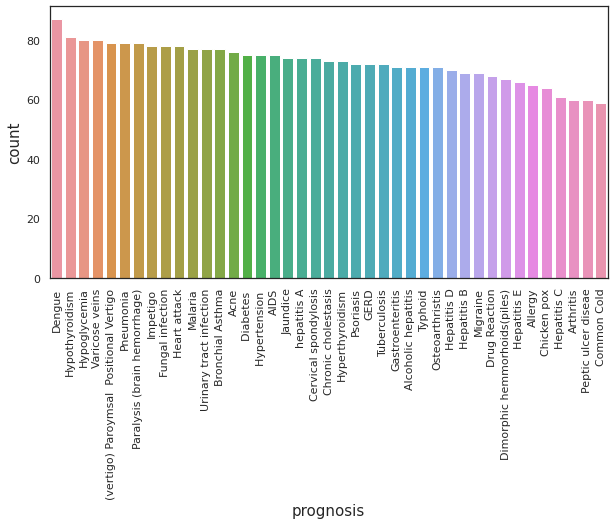

In [574]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(x=Y_train.prognosis.value_counts().index,y= Y_train.prognosis.value_counts());
plt.xlabel('prognosis', fontsize=15)
plt.ylabel('count', fontsize=15);

As, my data set is my huge, having so many number of columns , making sure , i don't miss any missing values for each of the column , I wanted to see visually how my missing value data set looks , so i could clarify that there are indeed no missing values present in the data set , I tried using matplotlib library from python  function for visualising the null value count, I plotted a bar plot with column being x axis and missing value count as my y axis , here i tried using a function called plt.xticks (rotation =90) which gives me rotation of x axis labels by 90 degrees , by default these are displayed horizontally , but as the columns as more in my data set , I tried rotating it by 90 degrees for better readability . I found from the graph that there are no missing values in the data set.

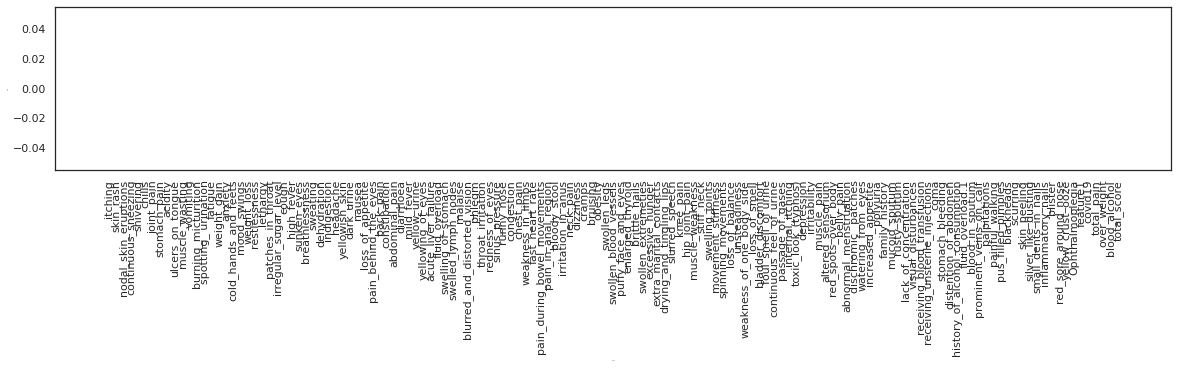

In [575]:
# Checking for missing data : 
plt.figure(figsize=(20, 3))
plt.xticks(rotation=90)
plt.bar(X_train.columns.tolist(),X_train.isnull().sum().tolist())
plt.xlabel('Classes', fontsize=1)
plt.ylabel('count', fontsize=1);
plt.show()

I tried to visually represent my correlation features using heat map from seaborn and matplotlib libraries , i set my seaborn style as white color , and I created a corr variable which takes in the absolute values of the correlation features , in the correlation matrix , the upper and lower triangle are symmetric , so i create a new variable called mask with zeros with the shape of my corr variable, and as a boolean variable , this hides my upper triangular matrix , which is symmetric with my lower triangular  matrix , and I create a heat map with different color scale , the vmax and center functions are used to set the maximum  and center values of the color scale and the shape is set to be as square , I am doing this visually , to get a picture of my correlation features and to understand my data in a better way , the fact that my upper triangular matrix is hidden can be clearly be evident if i change my seaborn color change to dark color . This heat map provides me with the visual representation of correlation of features in my data set

Text(0.5, 1.0, 'Multi-Collinearity of Features')

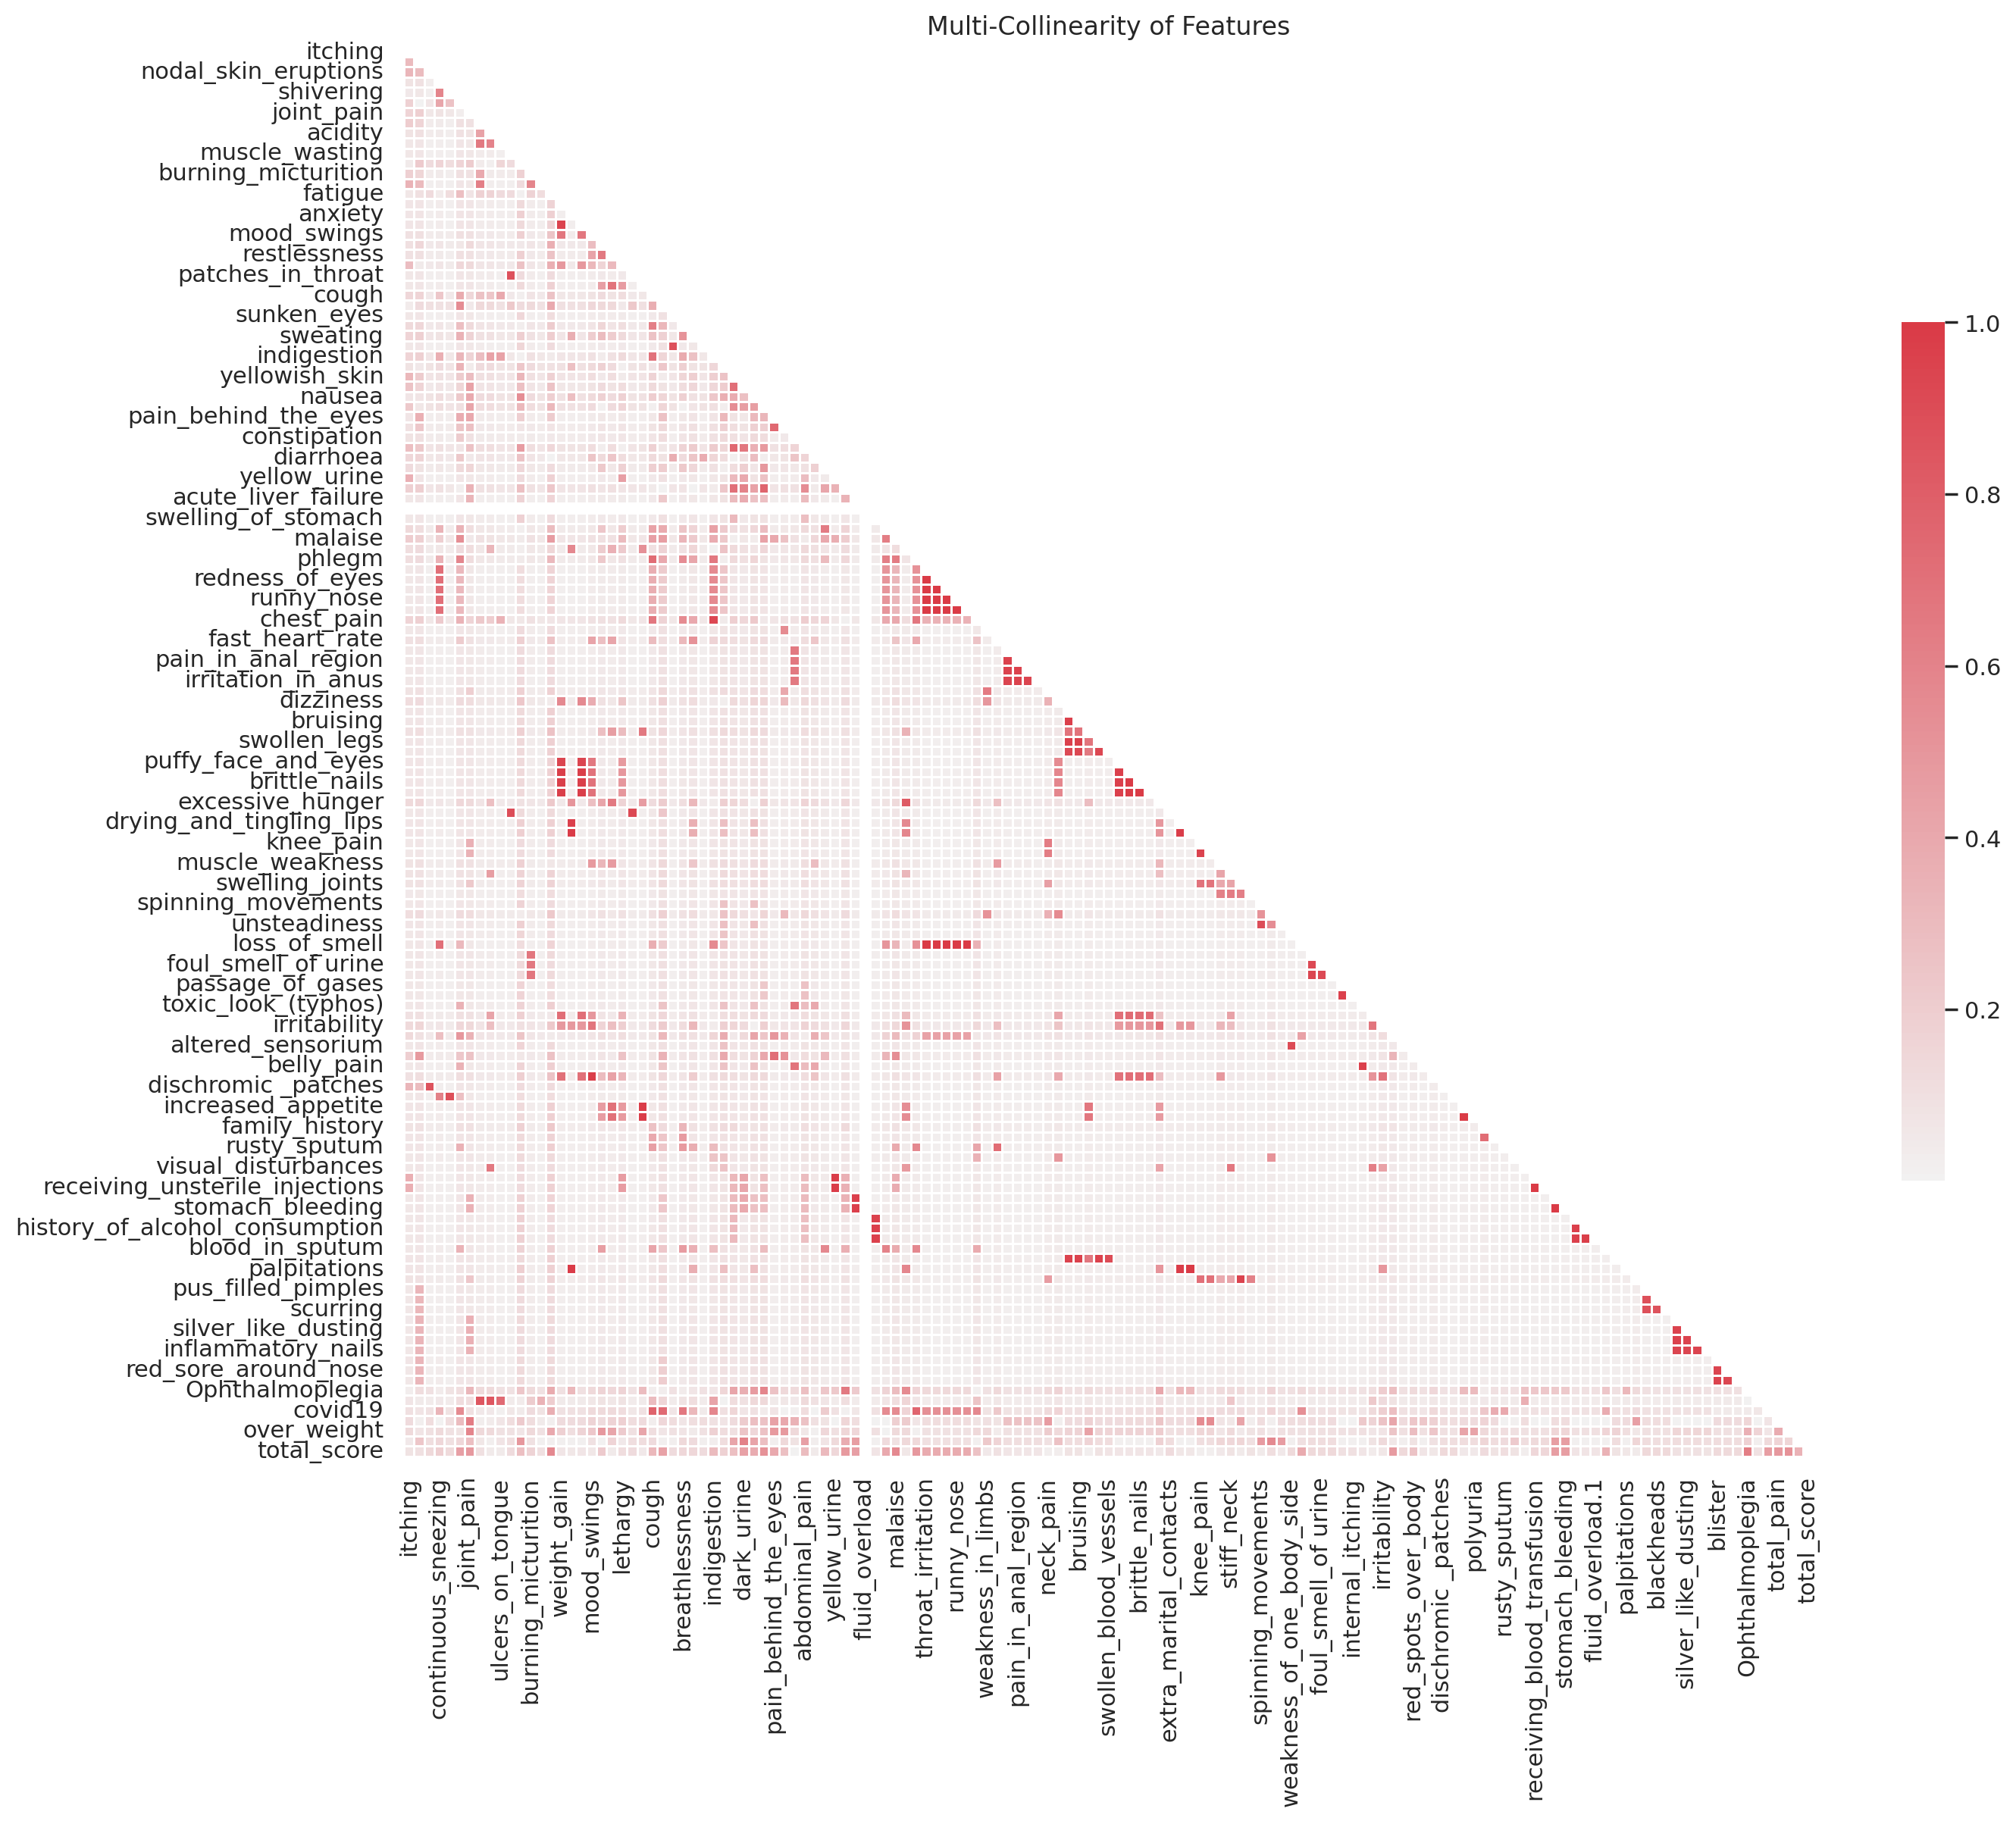

In [576]:
sns.set(style="white")

# Create a covariance matrix
corr = X_train.corr().abs()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15),dpi=200)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,
linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

As , the correlation matrix is symmetric , I just take the upper triangular matrix , I created a variable named upper_tri , which takes the shape of the correlation matrix and filled with ones , and the k = 1 value indicate the diagonal offset from the correlation matrix , it does not include diagonal from the matrix and it is converted to boolean values , where the lower triangle values are repaced with NaN values and the upper triangular values are kept in intact. I have performed this to find out pair of highly correlated features in my data set , with highly correlated features can be dropped to reduce the model complexity and to prevent overfitting

In [577]:
# display the matrix in a raw state
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
print(upper_tri)

                      itching  skin_rash  nodal_skin_eruptions  \
itching                   NaN   0.299429              0.323127   
skin_rash                 NaN        NaN              0.295940   
nodal_skin_eruptions      NaN        NaN                   NaN   
continuous_sneezing       NaN        NaN                   NaN   
shivering                 NaN        NaN                   NaN   
...                       ...        ...                   ...   
covid19                   NaN        NaN                   NaN   
total_pain                NaN        NaN                   NaN   
over_weight               NaN        NaN                   NaN   
blood_alcohol             NaN        NaN                   NaN   
total_score               NaN        NaN                   NaN   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                          0.079102   0.054886  0.173306    0.158770   
skin_rash                        0.089378   0.06201

Here , I perform the following steps , I run a loop , in the upper triangular values to check for highly correlated features , and i dropped the features greater than 0.8 , because of the high correlation which indicate that the features are not completely independent and they have a strong relationship , i tried to drop those many features and create a new data frame with the dropped features and I once again create my features and prognosis variables with the dropped features .51 features are dropped from 132 features  .After extensively performing the above upper triangular visualization and code , this is what we arrive at , all that is done , to drop some of features to reduce my model complexity and to prevent overfitting

In [581]:
# prepare the highly correlated features in a list so we can drop them :
#low_corr_columns = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
low_corr_columns = [column for column in upper_tri.columns if (any(upper_tri[column] > 0.7))]

to_drop=list(set(low_corr_columns)-set(created_features))

X_test_2=X_test.drop(columns=to_drop)
X_train_2=X_train.drop(columns=to_drop)
#features_2 = list(x_train_2.columns[:-1])  #features

print(len(to_drop)) # 52 Columns Dropped
#print(); print(to_drop)

62


In [583]:
X_test_2

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
4803        0          0                     0                    0   
1268        2          0                     0                    0   
4938        0          0                     0                    0   
1022        0          0                     0                    0   
2167        0          0                     0                    0   
...       ...        ...                   ...                  ...   
3769        0          0                     0                    0   
4856        0          0                     0                    0   
2683        0          0                     0                    0   
3737        0          0                     0                    0   
1350        0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
4803          0       0           0             0        0                 0   
1268          0       0           0             0        0                 0   
4938          0       3           0             0        0                 0   
1022          0       0           0             0        0                 0   
2167          0       0           0             0        2                 0   
...         ...     ...         ...           ...      ...               ...   
3769          0       0           0             0        0                 0   
4856          0       3           0             0        0                 0   
2683          0       3           0             0        0                 0   
3737          0       0           0             0        0                 0   
1350          0       0           0             0        0                 0   

      ...  pus_filled_pimples  skin_peeling  blister  Ophthalmoplegia  \
4803  ...                   0             0        0                0   
1268  ...                   0             0        0                4   
4938  ...                   0             0        0                0   
1022  ...                   0             0        0                4   
2167  ...                   0             0        0                5   
...   ...                 ...           ...      ...              ...   
3769  ...                   0             0        0                0   
4856  ...                   0             0        0                0   
2683  ...                   0             0        0                0   
3737  ...                   0             0        0                0   
1350  ...                   0             0        0                0   

      feature1  covid19  total_pain  over_weight  blood_alcohol  total_score  
4803         0        3           0            0              0          324  
1268         0        0           3            0              2         1024  
4938         0        3           9            0              2         2116  
1022         0        0           3            0              5         2704  
2167         2        0           0            0              0         1089  
...        ...      ...         ...          ...            ...          ...  
3769         0        0           0            0              0          225  
4856         0        3           9            0              2         2116  
2683         0        3           9            0              2         2116  
3737         0        3           0            0              0          324  
1350         0        0           6            3              7         1089  

[1985 rows x 77 columns]

I chose  the Random Forest classifier , which is proven to give good accuracy results for classification data and studying from literature survey regarding the disease classification , where in random forest was widely used , this was the reason i chose random forest model,
I perform cross validation for my data , which means that we divide the data set into multiple subsets  and each set is used as testing set , while training the model on other subsets , cross validation is performed to evaluate a models ability to generalize new data , it ensures the model is tested that it has not been trained on , it is also performed to prevent overfitting and for small datasets , as I have small datasets , and for my model to perform well for new data , I have used cross validation , it is stored in a variable rf_cross_score which stores the array of scores , one for each fold of  cross- validation and the mean value is printed for all the arrays for different folds.

In [584]:
Rf_cross_score = cross_val_score(RandomForestClassifier(), X_train_2, Y_train,cv = 5)
print(f'Random forest score\'s mean : {Rf_cross_score.mean()}')


Random forest score's mean : 0.9996644295302014


Here , I take the Random forest classifier to fit my data set in , I give the number of estimators , max depth as random values , number of estimators indicate number of decision trees in the forest , and max depth indicate the maximum depth of each decision tree in the random forest .I fit my model for X_train and Y_train values, it gets trained on the training  data i have created  which I have created earlier , and i created a new variable named y_pred which predicts my values on the testing set and I have printed the accuracy of my model 

In [627]:
#X_train,Y_train=train[features], train[target].ravel()
clf=RandomForestClassifier(n_estimators=100,random_state=0,max_depth = 5)
clf.fit(X_train_2, Y_train)
y_pred=clf.predict(X_test_2)
#ACCURACY SCORE
print(f"Accuracy->{metrics.accuracy_score(Y_test, y_pred)}")


Accuracy->0.9869017632241813


I have tried to determine the optimal number of estimators (number of trees) for the given data set , I have created an empty list called accuracy random forest ,I have written a for loop , which loops over the number of estimators till the range, for each number of estimator , I try to train my model and predict it on the test set and and tried to get accuracy for each number of estimator and tried plotting it with, to get the visual idea of number of trees required .

I have tried to determine the max depth for the given data set with the similar logic as number of estimators and accuracy , here i would loop over max depth and plot it with accuracy for each iteration and plot it to visually see the results 

In [595]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [596]:
X_train_2, X_test_2, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)


I wanted to perform hyper parameter tuning, to tune the accuracy ,i created a param_grid with number of estimators, criterion , max_depth , min _samples_split and max features and created a random forest classifier and with a grid search , with a k fold validation of 5 

In [597]:
param_grid = {
    'n_estimators': [100, 200,300],
    'criterion':['gini','entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'auto']
}


In [598]:
rf = RandomForestClassifier(random_state=42)


In [599]:
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5,)
grid_search.fit(X_train_2, Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]})

In [39]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best accuracy:', grid_search.best_score_)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy: 0.9966426033500649


In [40]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_2)
accuracy = accuracy_score(Y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.9964735516372796


We , get the best hyper parameters from the grid search CV,and after perfrorming grid search CV, I am able to get 99.6% as my accuracy

In [600]:
from sklearn.tree import plot_tree

In [612]:
Y_train

prognosis
1896         Tuberculosis
3873          hepatitis A
4414            Pneumonia
2960      Gastroenteritis
67                   AIDS
...                   ...
4426            Psoriasis
466   Peptic ulcer diseae
3092               Dengue
3772     Fungal infection
860         Drug Reaction

[2977 rows x 1 columns]

In [616]:
unique_values = data['prognosis'].unique()
len(unique_values)
type(unique_values)

numpy.ndarray

In [618]:
plt.figure(figsize =(200,170))
plot_tree(grid_search.best_estimator_.estimators_[5],feature_names = (X.columns),class_names = list(unique_values),filled = True);

In [624]:
print(confusion_matrix(Y_test, y_pred))


[[1 1 0 ... 0 0 0]
 [1 1 1 ... 0 1 3]
 [0 4 1 ... 2 0 1]
 ...
 [3 3 0 ... 2 3 1]
 [1 0 1 ... 1 0 2]
 [0 2 0 ... 0 2 1]]


# Conclusion


I have a disease classification dataset from Kaggle , I have performed initial Data Analysis and Feature engineering and dropped some features from collinearity chart and chose Random Forest Classification for my model, I obtained the accuracy as 95.5 % and Total Recall as 1 , I have created labels 2-5 for my symptoms features based on level of severity , Have included the sum absolute score of symptoms values , and removed some redundant features and I was able to obtain 98% accuracy , and I have performed Grid Search CV to tune my hyperparameters and got the best parameters from Grid Search CV and I have obtained my confusion matrix for this modified data set . I have realized that my data was perfect, which is not the usual case in the real world applications , I was able to get really high accuracies and Total recall values , I have tried experimenting different ways about how this is possible, I tried to tune my max depth in my random forest classifier and I was able to get down my accuracy  , and I have even looked at my Kaggle Dataset , other contributors code , and realized even they were getting really high accuracies and total recall values .

In [ ]:
# Run this cell to generate a pdf from this notebook
# Click the generated links to preview and download it.
# Report errors to Professor Kitchin
from s23 import webpdf
%webpdf



https://emeritus.org/blog/ai-ml-machine-learning-in-healthcare/#:~:text=Machine%20learning%20in%20healthcare%20can,on%20training%20in%20similar%20cases.


https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning